# Problem: Crime investigation

Dataset	and	Notebook
For	completing	this	notebook,	you	will	be	using	dataset	available	at:	https://data.police.uk/data/	(https://data.police.uk/data/).	To	get	the	dataset,	perform:
Provide	Date	at	top	(March	2021	to	March	2022).
In	Forces,	tick	West	Midland	Police	and	click	generate	file.
Then	press	download	to	download	the	data.
Create	a	folder	'crime'	in	the	same	folder	where	this	notebook	is	placed.	Extract	the	zip	file	to	this	folder.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os, re
from sklearn.preprocessing import	StandardScaler
from sklearn.preprocessing import	normalize
from IPython.display import	IFrame
from sklearn.cluster import	AgglomerativeClustering
import scipy.cluster.hierarchy as shc
%matplotlib	inline
import warnings
warnings.filterwarnings('ignore')

# Note
we generate Data file from March-21 to March-22

In [66]:
path_to_data	= './crime'
cd	=	os.path.dirname(os.path.abspath(path_to_data))
i	= 0
columns	= range(1,100)
dfList	=	[]
for	root,	dirs,	files	in	os.walk(cd):
				for	fname	in	files:
								if	re.match("^.*.csv$",	fname):
												frame	=	pd.read_csv(os.path.join(root,	fname))
												frame['key']	= "file{}".format(i)
												dfList.append(frame)				
												i	+= 1
dataset	=	pd.concat(dfList)


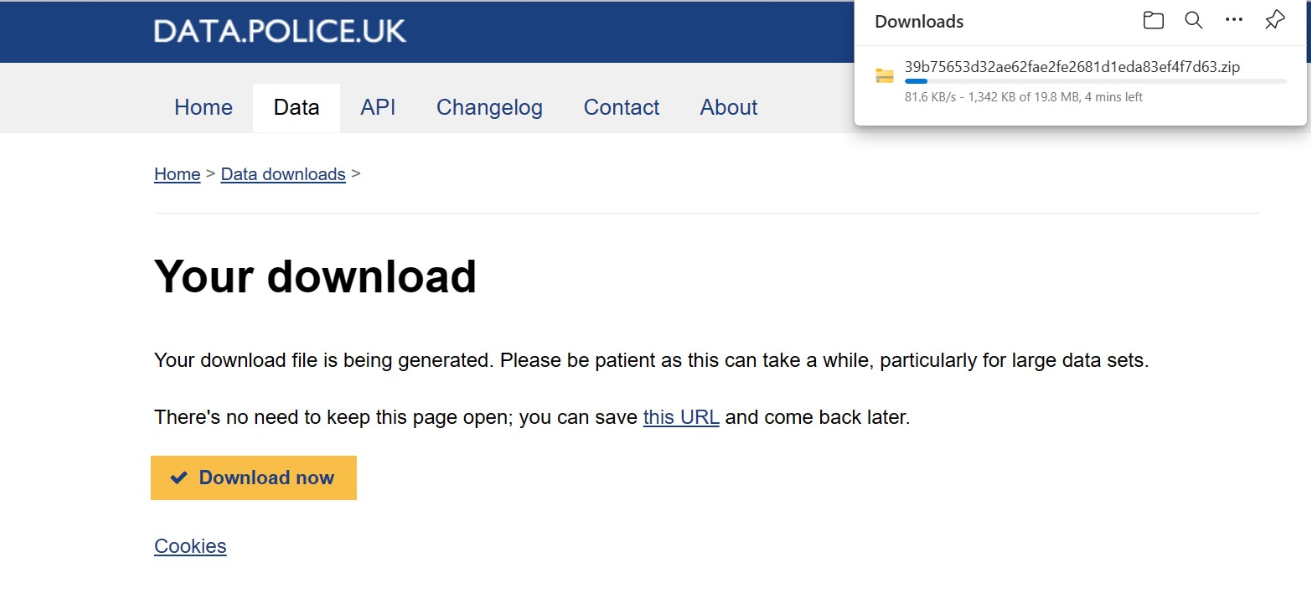

In [67]:
dataset.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key
0,5414100b888e6913bd56d115d5b5aeeda5279b57d3836a...,2021-03,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham 001A,Vehicle crime,Investigation complete; no suspect identified,NaN,file0
1,NaN,2021-03,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0
2,NaN,2021-03,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0
3,NaN,2021-03,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0
4,628c0858167cb41ee69f05e5163d1e88e8c145f3c2dae1...,2021-03,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Criminal damage and arson,Unable to prosecute suspect,NaN,file0


In [68]:
name_number	= 'chay.csv'
dataset.to_csv(name_number,	index=False)


In [69]:
data	=	pd.read_csv(name_number)


In [70]:
data.head(10)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key
0,5414100b888e6913bd56d115d5b5aeeda5279b57d3836a...,2021-03,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham 001A,Vehicle crime,Investigation complete; no suspect identified,NaN,file0
1,NaN,2021-03,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0
2,NaN,2021-03,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0
3,NaN,2021-03,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0
4,628c0858167cb41ee69f05e5163d1e88e8c145f3c2dae1...,2021-03,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Criminal damage and arson,Unable to prosecute suspect,NaN,file0
5,ba081a0e0b22453830efcc3f59aa570fe3e0622ea15c61...,2021-03,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0
6,5563fb7229d0f786f202f080a1ecb983b8241cc94922a9...,2021-03,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0
7,3cb1ca2e256368032fc59c84da11def497c7295965a551...,2021-03,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Criminal damage and arson,Unable to prosecute suspect,NaN,file0
8,cca91d618a2f45b08a3fc4177bbdd1ae8457a3d6711d6e...,2021-03,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Drugs,Unable to prosecute suspect,NaN,file0
9,7f943d0084634e67996914cbbdd312aa55a1a1432437ed...,2021-03,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Public order,Unable to prosecute suspect,NaN,file0


In [71]:
data['Crime type']

0                        Vehicle crime
1                Anti-social behaviour
2                Anti-social behaviour
3                Anti-social behaviour
4            Criminal damage and arson
                      ...             
419476    Violence and sexual offences
419477    Violence and sexual offences
419478    Violence and sexual offences
419479    Violence and sexual offences
419480                     Other crime
Name: Crime type, Length: 419481, dtype: object

In [72]:
data['Crime type'].value_counts()


Crime type
Violence and sexual offences    183970
Public order                     38447
Vehicle crime                    34790
Anti-social behaviour            33045
Criminal damage and arson        31729
Other theft                      23793
Burglary                         21397
Shoplifting                      15396
Robbery                           8352
Drugs                             8186
Other crime                       7217
Possession of weapons             6495
Theft from the person             3968
Bicycle theft                     2696
Name: count, dtype: int64

## Question 1:Using	a	similar	approach	display	the	number	of	crimes	in	each	month.	You	can	use	the	"Month"	column	to	do	that.


In [93]:
data['Month'].value_counts()


Month
2021-07    34608
2021-11    33771
2021-06    33535
2021-10    32990
2022-03    32597
2021-09    32594
2021-12    32204
2021-03    32115
2021-08    32095
2021-05    31923
2022-01    31283
2021-04    29969
2022-02    29797
Name: count, dtype: int64

In [73]:
data['town']	=	data['LSOA name'].str.split(' ').str[0]
data['town']

0            Birmingham
1            Birmingham
2            Birmingham
3            Birmingham
4            Birmingham
              ...      
419476    Wolverhampton
419477    Wolverhampton
419478    Wolverhampton
419479    Wolverhampton
419480    Wolverhampton
Name: town, Length: 419481, dtype: object

In [74]:
data.head()


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
0,5414100b888e6913bd56d115d5b5aeeda5279b57d3836a...,2021-03,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham 001A,Vehicle crime,Investigation complete; no suspect identified,NaN,file0,Birmingham
1,NaN,2021-03,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0,Birmingham
2,NaN,2021-03,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0,Birmingham
3,NaN,2021-03,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0,Birmingham
4,628c0858167cb41ee69f05e5163d1e88e8c145f3c2dae1...,2021-03,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Criminal damage and arson,Unable to prosecute suspect,NaN,file0,Birmingham


In [75]:
towns	=	['Wolverhampton']
filtered_data	=	data[data.town.str.contains('|'.join(towns),	na=False)]
filtered_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
29062,cb3409a57a028062ccdcac0ec50d250d4e20f13015da09...,2021-03,West Midlands Police,West Midlands Police,-2.129703,52.619162,On or near Supermarket,E01010434,Wolverhampton 001A,Bicycle theft,Status update unavailable,NaN,file0,Wolverhampton
29063,b012aec75fee67d5026d520721de342ba4668c791418df...,2021-03,West Midlands Police,West Midlands Police,-2.129317,52.618605,On or near Barrington Close,E01010434,Wolverhampton 001A,Burglary,Court result unavailable,NaN,file0,Wolverhampton
29064,204b5d3a5b711719ede93b28276100a51481c62734507f...,2021-03,West Midlands Police,West Midlands Police,-2.119967,52.618462,On or near Elston Hall Lane,E01010434,Wolverhampton 001A,Burglary,Investigation complete; no suspect identified,NaN,file0,Wolverhampton
29065,3761912046d212f4887fec64caf6b6cf896700f77e6f89...,2021-03,West Midlands Police,West Midlands Police,-2.120391,52.616843,On or near Ringwood Road,E01010434,Wolverhampton 001A,Criminal damage and arson,Unable to prosecute suspect,NaN,file0,Wolverhampton
29066,97d9e6665dcf000c107f7ad32661a883855381d6e83ae0...,2021-03,West Midlands Police,West Midlands Police,-2.129427,52.620663,On or near Three Tuns Parade,E01010434,Wolverhampton 001A,Drugs,Court result unavailable,NaN,file0,Wolverhampton


## Question 2:	Display	crime	types	in	Wolverhampton.


In [97]:
Wolverhampton_town = data[data['town'] == 'Wolverhampton']

crime_wolverhampton = Wolverhampton_town['Crime type'].unique()

print(crime_wolverhampton)

['Bicycle theft' 'Burglary' 'Criminal damage and arson' 'Drugs'
 'Public order' 'Vehicle crime' 'Violence and sexual offences'
 'Anti-social behaviour' 'Other crime' 'Other theft' 'Shoplifting'
 'Possession of weapons' 'Robbery' 'Theft from the person']


In [76]:
filtered_data['LSOA code'].value_counts().nlargest(10)


LSOA code
E01010521    3394
E01010564    1351
E01010414     990
E01010410     737
E01010450     691
E01010453     540
E01010473     537
E01010464     537
E01010530     534
E01010463     518
Name: count, dtype: int64

## Question 3:Provide	a	prime	landmark	of	alteast	2	LSOA	code.	If	there	is	no	recognisable	prime	landmark,	provide	name(s)	of	the	nearby	streets/roads sorrounding	that	area.
### Land Mark of LOAS Code: E01010450
##### Postcode ▴	Latitude	Longitude	Easting	Northing	
##### WV14 0BP	52.56531	-2.079704	394694	296390	
##### WV14 0BT	52.565402	-2.079621	394700	296400

### Land Mark of LOAS Code:E01010564
##### Postcode	Latitude	Longitude	Easting	Northing	
##### WV10 0TH	52.594598	-2.096267	393576	299649	
##### WV10 0TJ	52.595227	-2.096387	393568	299719	

In [77]:
filtered_important_data	=	filtered_data[['LSOA code','Crime type']]
filtered_important_data.head()

,LSOA code,Crime type
29062,E01010434,Bicycle theft
29063,E01010434,Burglary
29064,E01010434,Burglary
29065,E01010434,Criminal damage and arson
29066,E01010434,Drugs


In [78]:
filtered_important_data	= filtered_data[['LSOA code','Crime type']]
filtered_important_data	= pd.get_dummies(filtered_important_data,	columns=['Crime type'])
clustering_data	= filtered_important_data.groupby(['LSOA code']).agg({'Crime type_Anti-social behaviour':'sum',
'Crime type_Bicycle theft':'sum',
'Crime type_Burglary':'sum',
'Crime type_Criminal damage and arson':'sum',
'Crime type_Drugs':'sum',	
'Crime type_Other crime':'sum',	
'Crime type_Other theft':'sum',	
'Crime type_Possession of weapons':'sum',	
'Crime type_Public order':'sum',	
'Crime type_Robbery':'sum',	
'Crime type_Shoplifting':'sum',	
'Crime type_Theft from the person':'sum',	
'Crime type_Vehicle crime':'sum',	
'Crime type_Violence and sexual offences':'sum'}).reset_index()

In [79]:
clustering_data[:5]


,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01010410,80,4,37,48,1,9,137,7,67,19,25,3,80,220
1,E01010411,6,0,6,19,2,7,5,1,12,1,0,1,11,128
2,E01010412,26,0,14,41,1,9,10,6,32,7,0,1,33,204
3,E01010413,19,1,14,21,2,7,9,4,16,5,53,0,24,131
4,E01010414,80,11,84,105,8,20,36,11,101,21,63,15,96,339


In [80]:
clustering_data_original=clustering_data.copy()
clustering_data_original.head()


,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01010410,80,4,37,48,1,9,137,7,67,19,25,3,80,220
1,E01010411,6,0,6,19,2,7,5,1,12,1,0,1,11,128
2,E01010412,26,0,14,41,1,9,10,6,32,7,0,1,33,204
3,E01010413,19,1,14,21,2,7,9,4,16,5,53,0,24,131
4,E01010414,80,11,84,105,8,20,36,11,101,21,63,15,96,339


In [81]:
clustering_data.drop(['LSOA code'],	axis= 1,inplace	= True,	errors	= 'ignore')
clustering_data.head()


,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,80,4,37,48,1,9,137,7,67,19,25,3,80,220
1,6,0,6,19,2,7,5,1,12,1,0,1,11,128
2,26,0,14,41,1,9,10,6,32,7,0,1,33,204
3,19,1,14,21,2,7,9,4,16,5,53,0,24,131
4,80,11,84,105,8,20,36,11,101,21,63,15,96,339


In [82]:
data_scaled	=	normalize(clustering_data)
data_scaled	=	pd.DataFrame(data_scaled,	columns=clustering_data.columns)
data_scaled.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,0.267750,0.013388,0.123835,0.160650,0.003347,0.030122,0.458522,0.023428,0.224241,0.063591,0.083672,0.010041,0.267750,0.736313
1,0.045799,0.000000,0.045799,0.145030,0.015266,0.053432,0.038166,0.007633,0.091598,0.007633,0.000000,0.007633,0.083965,0.977042
2,0.120507,0.000000,0.064889,0.190031,0.004635,0.041714,0.046349,0.027809,0.148317,0.032444,0.000000,0.004635,0.152952,0.945519
3,0.128168,0.006746,0.094440,0.141659,0.013491,0.047220,0.060711,0.026983,0.107931,0.033728,0.357521,0.000000,0.161896,0.883684
4,0.196675,0.027043,0.206509,0.258136,0.019667,0.049169,0.088504,0.027043,0.248302,0.051627,0.154881,0.036877,0.236010,0.833409


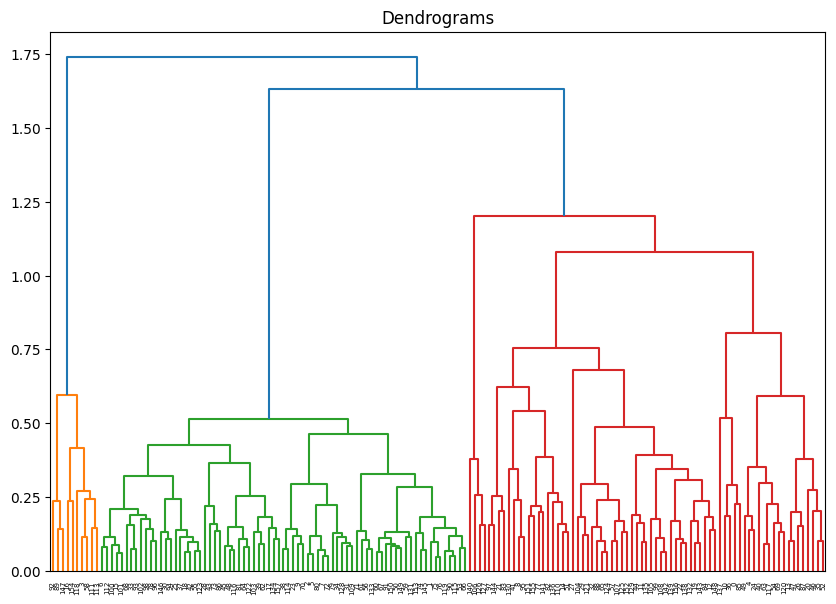

In [83]:
plt.figure(figsize=(10,	7))		
plt.title("Dendrograms")		
dend=shc.dendrogram(shc.linkage(data_scaled,	method='ward'))

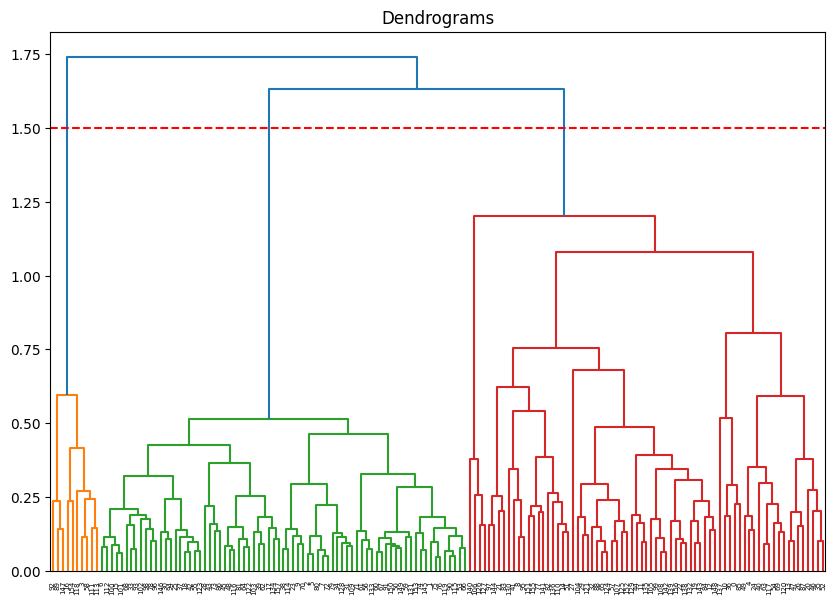

In [84]:
plt.figure(figsize=(10,	7))		
plt.title("Dendrograms")		
dend	=	shc.dendrogram(shc.linkage(data_scaled,	method='ward'))
plt.axhline(y=1.5,	color='r',	linestyle='--')


## Question 4:Discuss	what	happens	when	you	decide	to	cut	the	dendogram	in	different	level.

When you decide to cut the dendrogram at different levels, it affects the number of clusters you identify in the dataset. The dendrogram is a visual representation of the hierarchical clustering process, where each point on the vertical axis represents a cluster and the horizontal axis represents the distance between clusters. Cutting the dendrogram at a certain height means deciding the number of clusters you want to form.

Let's explore what happens when you cut the dendrogram at different levels:

Cutting at a high distance:
If you cut the dendrogram at a high distance (e.g., higher than the threshold of 1.5 in your example), you will get a small number of large clusters. The clusters will be more generalized and might not capture the finer patterns in the data.

Cutting at a moderate distance:
Cutting the dendrogram at a moderate distance will result in a moderate number of clusters. This might provide a balance between capturing meaningful patterns and avoiding over-segmentation.

Cutting at a low distance:
Cutting the dendrogram at a low distance (e.g., lower than the threshold of 1.5) will lead to a large number of small clusters. The clusters will be more specific and might capture noise or irrelevant patterns in the data.

Choosing the appropriate level to cut the dendrogram is subjective and domain-specific. It depends on the nature of the data, the problem you are trying to solve, and your knowledge of the domain. Different levels of cutting might reveal different insights from the data. In practice, you can experiment with different thresholds and evaluate the clustering results to find the one that best aligns with your objectives.

It's worth noting that hierarchical clustering is just one of the clustering techniques, and depending on the dataset and the problem, other clustering algorithms like k-means, DBSCAN, etc., might be more suitable. Each method has its own strengths and weaknesses, and the choice of clustering algorithm should be based on the characteristics of the data and the specific problem at hand.

In [85]:
cluster	=	AgglomerativeClustering(n_clusters=3,	affinity='euclidean',	linkage='ward')		
cluster_ids	=	cluster.fit_predict(data_scaled)

c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [86]:
clustering_data['cluster']	=	cluster_ids
clustering_data.head()


,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,80,4,37,48,1,9,137,7,67,19,25,3,80,220,0
1,6,0,6,19,2,7,5,1,12,1,0,1,11,128,2
2,26,0,14,41,1,9,10,6,32,7,0,1,33,204,2
3,19,1,14,21,2,7,9,4,16,5,53,0,24,131,1
4,80,11,84,105,8,20,36,11,101,21,63,15,96,339,0


In [87]:
hiarchical_cluster	=	pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hiarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,15.8,1.3,11.3,16.3,2.6,3.4,11.4,2.2,17.6,2.8,4.9,1.1,22.2,79.7
1,49.2,11.7,31.0,42.6,13.5,8.6,42.6,12.1,71.9,14.2,98.7,11.9,39.8,256.2
2,17.3,1.5,11.9,20.7,4.1,5.3,11.4,4.2,21.7,3.4,3.0,1.2,18.3,137.6


## Question 5.	Discuss	the	cluster	results	based	on	your	dataset.

Based on the dataset and clustering results, we have three clusters with the following characteristics:

Cluster ID 1 (High-risk areas):

This cluster includes LSOA codes with the highest number of crimes across all crime types.
It has significantly higher values for almost all crime types, indicating that these areas are at a higher risk in terms of crime.
Cluster ID 0 (Lower/mild-risk areas):

This cluster includes LSOA codes with the lowest number of crimes across all crime types.
It has lower values for all crime types compared to the other clusters, suggesting that these areas are relatively safer with fewer reported crimes.
Cluster ID 2 (Moderate-risk areas):

This cluster includes the rest of the LSOA codes that fall between the high-risk and low-risk areas.
It has moderate values for crime types, indicating that these areas have a moderate number of reported crimes.
These cluster results can provide valuable insights for understanding the distribution of crime across different areas. Cluster ID 1 represents high-risk areas that may require additional attention and resources for crime prevention and law enforcement. Cluster ID 0 identifies areas with lower crime rates, which could be considered safer and potentially suitable for residential or commercial development.

The clustering results can assist in identifying patterns and spatial distribution of crime across different areas, which can help law enforcement agencies, policymakers, and local communities in making informed decisions related to crime prevention strategies, resource allocation, and urban planning.

It's important to note that the effectiveness and interpretation of the clustering results depend on the quality and representativeness of the dataset used for clustering. Additionally, the choice of distance metric, linkage method, and the number of clusters (k) can also influence the clustering outcomes. As such, it's always recommended to validate and evaluate the clustering results through domain knowledge and further analysis to ensure they align with the specific context and problem at hand

In [88]:
clustering_data_original['cluster']	=	cluster_ids
clusters	=	clustering_data_original[['LSOA code',	'cluster']]

In [89]:
clusters.head()


,LSOA code,cluster
0,E01010410,0
1,E01010411,2
2,E01010412,2
3,E01010413,1
4,E01010414,0


In [90]:
clustered_full	=	pd.merge(filtered_data,	clusters,	on='LSOA code')
clustered_full.head()


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town,cluster
0,cb3409a57a028062ccdcac0ec50d250d4e20f13015da09...,2021-03,West Midlands Police,West Midlands Police,-2.129703,52.619162,On or near Supermarket,E01010434,Wolverhampton 001A,Bicycle theft,Status update unavailable,NaN,file0,Wolverhampton,0
1,b012aec75fee67d5026d520721de342ba4668c791418df...,2021-03,West Midlands Police,West Midlands Police,-2.129317,52.618605,On or near Barrington Close,E01010434,Wolverhampton 001A,Burglary,Court result unavailable,NaN,file0,Wolverhampton,0
2,204b5d3a5b711719ede93b28276100a51481c62734507f...,2021-03,West Midlands Police,West Midlands Police,-2.119967,52.618462,On or near Elston Hall Lane,E01010434,Wolverhampton 001A,Burglary,Investigation complete; no suspect identified,NaN,file0,Wolverhampton,0
3,3761912046d212f4887fec64caf6b6cf896700f77e6f89...,2021-03,West Midlands Police,West Midlands Police,-2.120391,52.616843,On or near Ringwood Road,E01010434,Wolverhampton 001A,Criminal damage and arson,Unable to prosecute suspect,NaN,file0,Wolverhampton,0
4,97d9e6665dcf000c107f7ad32661a883855381d6e83ae0...,2021-03,West Midlands Police,West Midlands Police,-2.129427,52.620663,On or near Three Tuns Parade,E01010434,Wolverhampton 001A,Drugs,Court result unavailable,NaN,file0,Wolverhampton,0


In [91]:
def get_color(cluster_id):
				if	cluster_id	== 1:
								return 'darkred'
				if	cluster_id	== 0:
								return 'green'
				if	cluster_id	== 2:
								return 'yellow'


In [92]:
#create	a	map
this_map	=	folium.Map(location	=[clustered_full["Latitude"].mean(),	clustered_full["Longitude"].mean()],zoom_start=5)
def plot_dot(point):
				'''input:	series	that	contains	a	numeric	named	latitude	and	a	numeric	named	longitude
				this	function	creates	a	CircleMarker	and	adds	it	to	your	this_map'''
				folium.CircleMarker(location=[point.Latitude,	point.Longitude],
																								radius=2,	
																								color=point.color,
																								weight=1).add_to(this_map)
				
				
clustered_full["color"]	=	clustered_full["cluster"].apply(lambda	x:	get_color(x))
#use	df.apply(,axis=1)	to	iterate	through	every	row	in	your	dataframe
clustered_full.apply(plot_dot,	axis	= 1)
#Set	the	zoom	to	the	maximum	possible
this_map.fit_bounds(this_map.get_bounds())
#Save	the	map	to	an	HTML	file
this_map.save(os.path.join('Crime_map.html'))

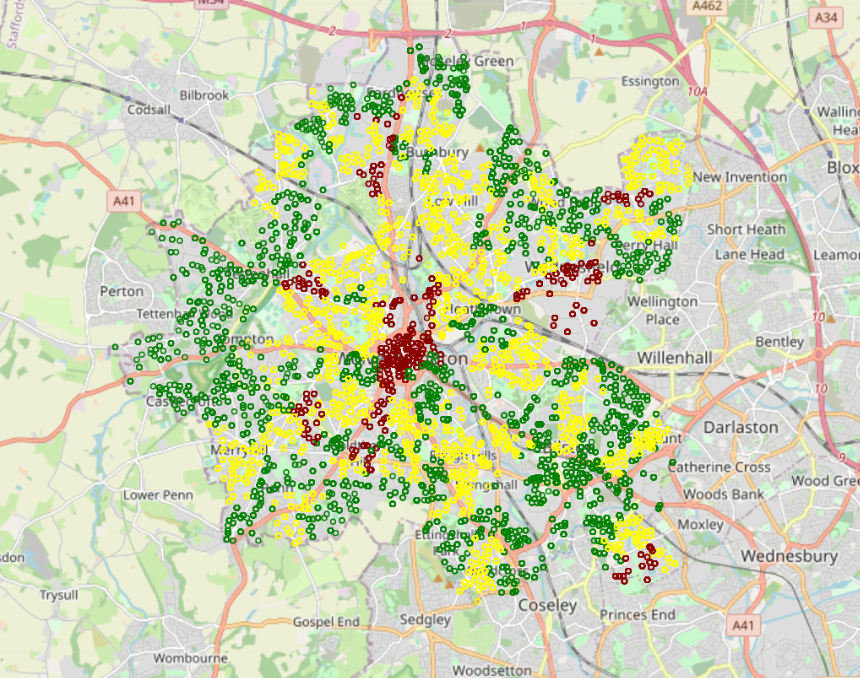

## Question :Change	the	number	of	clusters	to	a	different	value	and	perform	the	clustering	algorithm	and	draw	the	graph	again.	Discuss	your	results	briefly.


In [102]:
cluster	=	AgglomerativeClustering(n_clusters=5,	affinity='euclidean',	linkage='ward')		
cluster_ids	=	cluster.fit_predict(data_scaled)
clustering_data['cluster']	=	cluster_ids
clustering_data.head()
hiarchical_cluster	=	pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hiarchical_cluster


c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,33.6,3.2,16.4,30.6,5.2,5.5,24.9,4.0,32.9,6.5,11.9,2.2,26.9,131.3
1,8.3,0.6,9.5,10.6,1.4,2.6,5.8,1.5,11.5,1.3,2.1,0.6,19.9,60.0
2,17.3,1.5,11.9,20.7,4.1,5.3,11.4,4.2,21.7,3.4,3.0,1.2,18.3,137.6
3,7.0,0.2,5.2,4.0,1.2,1.8,3.2,0.8,5.5,0.5,0.0,1.0,24.8,26.2
4,49.2,11.7,31.0,42.6,13.5,8.6,42.6,12.1,71.9,14.2,98.7,11.9,39.8,256.2


In [103]:
clustering_data_original['cluster']	=	cluster_ids
clusters	=	clustering_data_original[['LSOA code',	'cluster']]
clusters.head()
clustered_full	=	pd.merge(filtered_data,	clusters,	on='LSOA code')
clustered_full.head()
def get_color(cluster_id):
				if	cluster_id	== 1:
								return 'darkred'
				if	cluster_id	== 0:
								return 'green'
				if	cluster_id	== 2:
								return 'yellow'
				if	cluster_id	== 3:
								return 'black'
				if	cluster_id	== 4:
								return 'orange'

In [104]:
#create	a	map
this_map	=	folium.Map(location	=[clustered_full["Latitude"].mean(),	clustered_full["Longitude"].mean()],zoom_start=5)
def plot_dot(point):
				'''input:	series	that	contains	a	numeric	named	latitude	and	a	numeric	named	longitude
				this	function	creates	a	CircleMarker	and	adds	it	to	your	this_map'''
				folium.CircleMarker(location=[point.Latitude,	point.Longitude],
																								radius=2,	
																								color=point.color,
																								weight=1).add_to(this_map)
				
				
clustered_full["color"]	=	clustered_full["cluster"].apply(lambda	x:	get_color(x))
#use	df.apply(,axis=1)	to	iterate	through	every	row	in	your	dataframe
clustered_full.apply(plot_dot,	axis	= 1)
#Set	the	zoom	to	the	maximum	possible
this_map.fit_bounds(this_map.get_bounds())
#Save	the	map	to	an	HTML	file
this_map.save(os.path.join('new_Crime_5_clusters_map.html'))


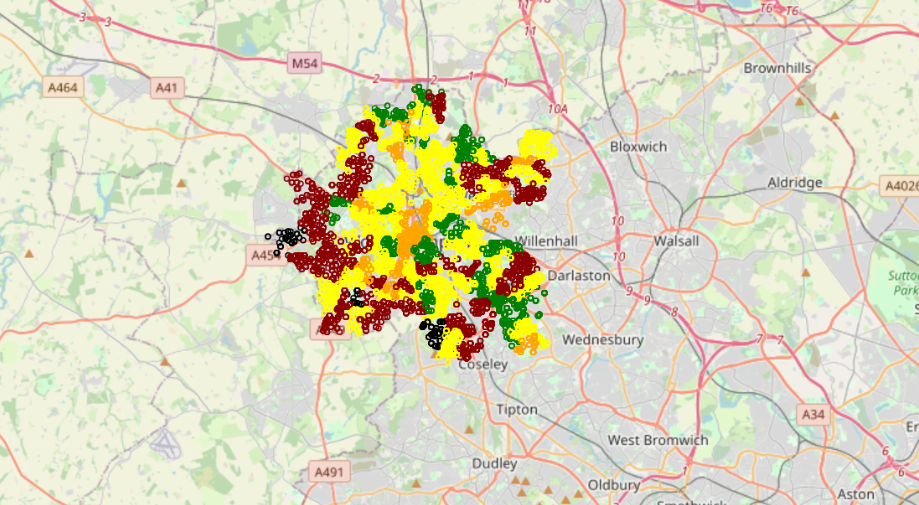

## Question :Consider	a	different	towns	(example	:	dudley)	and	perform	the	clustering	again.	You	should	choose	the	number	of	clusters	from	the	dendrogramaccordingly.	Discuss	your	results	briefly
# we have selected Town=Birmingham

In [106]:
towns	=	['Birmingham']
filtered_data	=	data[data.town.str.contains('|'.join(towns),	na=False)]
filtered_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
0,5414100b888e6913bd56d115d5b5aeeda5279b57d3836a...,2021-03,West Midlands Police,West Midlands Police,-1.851038,52.593177,On or near Longdon Drive,E01009417,Birmingham 001A,Vehicle crime,Investigation complete; no suspect identified,NaN,file0,Birmingham
1,NaN,2021-03,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0,Birmingham
2,NaN,2021-03,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0,Birmingham
3,NaN,2021-03,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0,Birmingham
4,628c0858167cb41ee69f05e5163d1e88e8c145f3c2dae1...,2021-03,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Criminal damage and arson,Unable to prosecute suspect,NaN,file0,Birmingham


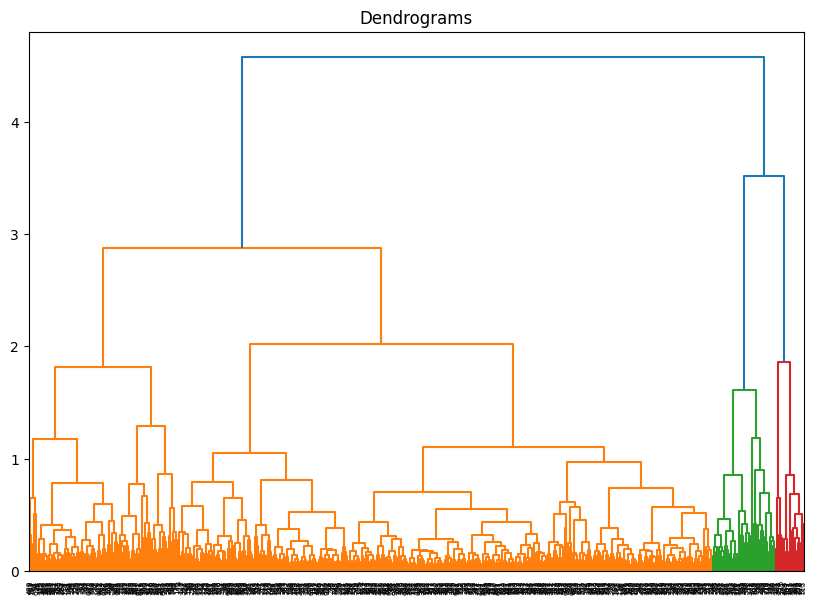

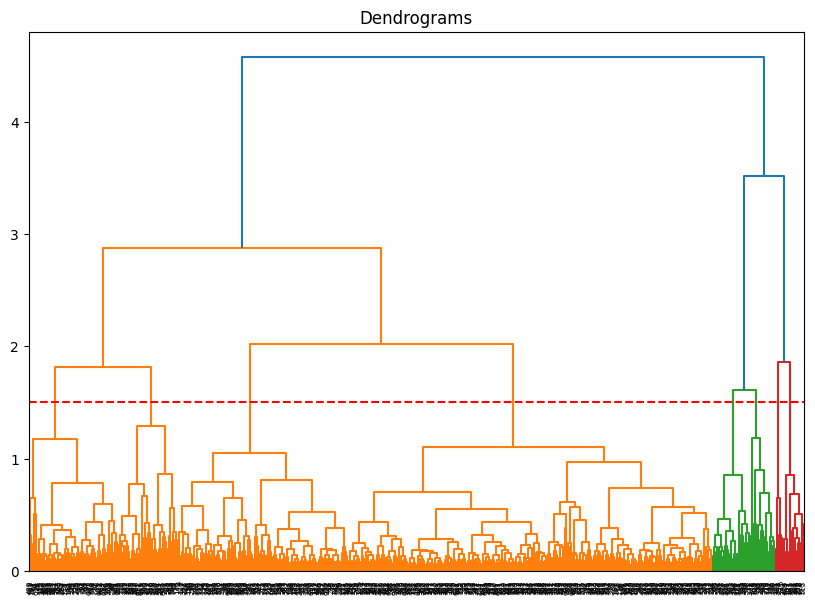

In [107]:


filtered_data['LSOA code'].value_counts().nlargest(10)
filtered_important_data	=	filtered_data[['LSOA code','Crime type']]
filtered_important_data.head()
filtered_important_data	= filtered_data[['LSOA code','Crime type']]
filtered_important_data	= pd.get_dummies(filtered_important_data,	columns=['Crime type'])
clustering_data	= filtered_important_data.groupby(['LSOA code']).agg({'Crime type_Anti-social behaviour':'sum',
'Crime type_Bicycle theft':'sum',
'Crime type_Burglary':'sum',
'Crime type_Criminal damage and arson':'sum',
'Crime type_Drugs':'sum',	
'Crime type_Other crime':'sum',	
'Crime type_Other theft':'sum',	
'Crime type_Possession of weapons':'sum',	
'Crime type_Public order':'sum',	
'Crime type_Robbery':'sum',	
'Crime type_Shoplifting':'sum',	
'Crime type_Theft from the person':'sum',	
'Crime type_Vehicle crime':'sum',	
'Crime type_Violence and sexual offences':'sum'}).reset_index()
clustering_data[:5]
clustering_data_original=clustering_data.copy()
clustering_data_original.head()
clustering_data.drop(['LSOA code'],	axis= 1,inplace	= True,	errors	= 'ignore')
clustering_data.head()
data_scaled	=	normalize(clustering_data)
data_scaled	=	pd.DataFrame(data_scaled,	columns=clustering_data.columns)
data_scaled.head()
plt.figure(figsize=(10,	7))		
plt.title("Dendrograms")		
dend=shc.dendrogram(shc.linkage(data_scaled,	method='ward'))
plt.figure(figsize=(10,	7))		
plt.title("Dendrograms")		
dend	=	shc.dendrogram(shc.linkage(data_scaled,	method='ward'))
plt.axhline(y=1.5,	color='r',	linestyle='--')